In [41]:
import pandas as pd

In [42]:
import json

In [43]:
data = json.loads(open("complete.json").read())
data.keys()

dict_keys(['programs'])

In [44]:
ny_phil = pd.read_csv('ny_phil.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
ny_phil[ny_phil.composerName.str.contains('Beethoven') & ny_phil.composerName.notnull()].head()

,Date,Location,Time,Venue,eventType,id,composerName,conductorName,interval,movement,workTitle,soloistInstrument,soloistName,soloistRoles,season,programID,orchestra
0,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",NaN,NaN,"SYMPHONY NO. 5 IN C MINOR, OP.67",Soprano,"Otto, Antoinette",S,1842-43,3853.0,New York Philharmonic
1,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",NaN,NaN,"SYMPHONY NO. 5 IN C MINOR, OP.67",Piano,"Scharfenberg, William",A,1842-43,3853.0,New York Philharmonic
2,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",NaN,NaN,"SYMPHONY NO. 5 IN C MINOR, OP.67",Violin,"Hill, Ureli Corelli",A,1842-43,3853.0,New York Philharmonic
3,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",NaN,NaN,"SYMPHONY NO. 5 IN C MINOR, OP.67",Viola,"Derwort, G. H.",A,1842-43,3853.0,New York Philharmonic
4,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",NaN,NaN,"SYMPHONY NO. 5 IN C MINOR, OP.67",Cello,"Boucher, Alfred",A,1842-43,3853.0,New York Philharmonic


In [46]:
phil_composer = ny_phil.groupby(['season','workTitle'])['composerName'].value_counts().reset_index(level=0)
phil_composer = phil_composer.rename(columns = {'composerName':'count'}).reset_index()
phil_composer['count'] = 1
phil_composer.tail()

,workTitle,composerName,season,count
32605,"WEST SIDE STORY, SYMPHONIC DANCES","Bernstein, Leonard",2016-17,1
32606,WEXFORD CAROL (ARR. Snedecor),"Anonymous,",2016-17,1
32607,WING ON WING,"Salonen, Esa-Pekka",2016-17,1
32608,YOGA,"Bjork [Björk],",2016-17,1
32609,YOU ARE MY SUNSHINE (ARR. Young),"Davis, Jimmie",2016-17,1


In [47]:
composer_data = phil_composer[phil_composer.composerName.str.contains('Beethoven|Mozart,  Wolfgang|Wagner,  Richard|Tchaikovsky')]

In [48]:
composer_data['year'] = composer_data['season'].astype(str).str.extract('(\d{4}).*')
composer_data['year'] = composer_data['year'].astype(str).astype(int)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,workTitle,composerName,season,count,year
0,"ABDUCTION FROM THE SERAGLIO,THE, K.384","Mozart, Wolfgang Amadeus",1842-43,1,1842
6,"EGMONT, OP.84","Beethoven, Ludwig van",1842-43,1,1842
9,"FIDELIO, OP. 72","Beethoven, Ludwig van",1842-43,1,1842
14,"MAGIC FLUTE, THE, K.620","Mozart, Wolfgang Amadeus",1842-43,1,1842
21,"SEPTET, E-FLAT MAJOR, OP.20","Beethoven, Ludwig van",1842-43,1,1842


In [50]:
composer_data['year'] = composer_data['year'].astype(str).astype(int)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
composer_data.dtypes

workTitle       object
composerName    object
season          object
count            int64
year             int64
dtype: object

In [53]:
composer_total = phil_composer.groupby(['season','composerName'])['count'].sum().to_frame().reset_index()

composer_total = phil_composer.groupby('season')['count'].sum().reset_index().rename(columns={'count':'total'})

In [54]:
#phil_composer = phil_composer.merge(composer_total, on='season', how='left')
phil_composer = phil_composer.groupby('season')['composerName'].value_counts().to_frame().rename(columns={'composerName':'work_count'}).reset_index()

In [55]:
phil_composer = phil_composer.merge(composer_total, on='season', how='left')
phil_composer.head(2)

,season,composerName,work_count,total
0,1842-43,"Beethoven, Ludwig van",6,29
1,1842-43,"Hummel, Johann",3,29


In [56]:
phil_composer.groupby('season')['work_count'].sum().to_frame().reset_index().plot()
plt.savefig('total_performance.pdf')

In [57]:
phil_composer['percent'] = phil_composer['work_count'] / phil_composer['total'] 

In [58]:
top4 = phil_composer[phil_composer['composerName'].str.contains('Beethoven|Mozart,  Wolfgang|Wagner,  Richard|Tchaikovsky')]
top4.head()

,season,composerName,work_count,total,percent
0,1842-43,"Beethoven, Ludwig van",6,29,0.206897
4,1842-43,"Mozart, Wolfgang Amadeus",2,29,0.068966
17,1843-44,"Beethoven, Ludwig van",2,21,0.095238
20,1843-44,"Mozart, Wolfgang Amadeus",2,21,0.095238
31,1844-45,"Beethoven, Ludwig van",4,26,0.153846


In [61]:
import matplotlib.pyplot as plt

#fig, ax = plt.subplots()
top4[top4.composerName.str.contains('Beethoven')].plot(x='season', y='work_count', legend=False)
plt.savefig('composer_percentage_b_count.pdf')

In [60]:
top4[top4.composerName.str.contains('Beethoven')].work_count.plot()#.area(stacked=False)

In [62]:
all_data = data['programs']
list_of_allcomposer = []
list_of_allwork = []
list_of_season = []
for concert in all_data:
    for work in concert['works']:
        if work['ID'] != "0*" and 'composerName' in work:#print(work['ID'])
            #print(work['composerName'])
            list_of_allcomposer.append(work['composerName'])
            list_of_allwork.append(work['workTitle'])
            list_of_season.append(concert['season'])
        
info_all = pd.DataFrame(
    {'composer': list_of_allcomposer,
     'work': list_of_allwork,
     'season':list_of_season
    })

In [105]:
cdata = info_all[info_all.composer.str.contains('Beethoven|Mozart,  Wolfgang|Wagner,  Richard|Tchaikovsky')]

cdata['year'] = cdata['season'].astype(str).str.extract('(\d{4}).*')
cdata['year'] = cdata['year'].astype(str).astype(int)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [106]:
cdata.dtypes

composer    object
season      object
work        object
year         int64
dtype: object

In [108]:
from ggplot import *

In [130]:
from matplotlib import pyplot as plt

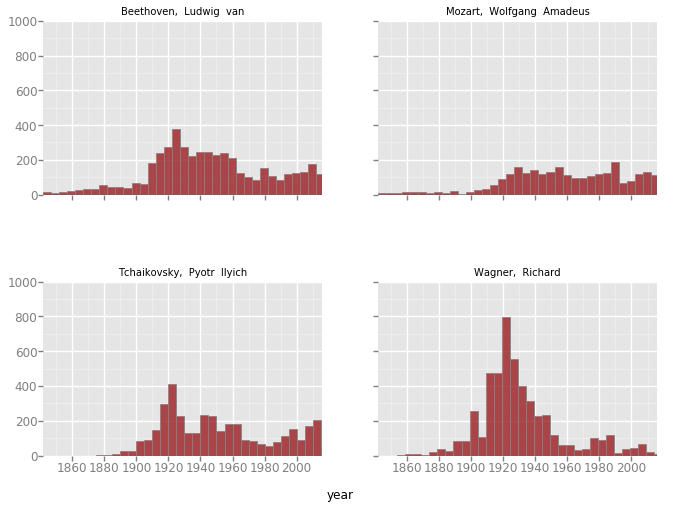

In [176]:
myggplot = ggplot(cdata, aes(x='year')) + \
    geom_histogram(alpha=.8, position = 'stack', stat = 'bin', binwidth=5, fill="#9B1D21", color = "#848484") + \
    facet_wrap("composer")+\
    geom_density() +\
    xlim(1842, 2016) +\
    ylim(0,1000)

myggplot.save('gg.png', width=None, height=None, dpi=180)

In [63]:
beethoven = info_all[info_all.composer.str.contains('Beethoven')].groupby('season')['work'].value_counts().to_frame().reset_index(level=0)

In [64]:
beethoven=beethoven.rename(columns={'work':'b_count'})
beethoven = beethoven.reset_index()
beethoven=beethoven.rename(columns={'work':'b_work'})

In [350]:
#beethoven.groupby('season')['b_count'].sum().head()

In [69]:
b = beethoven.groupby('season')['b_count'].sum().to_frame().reset_index()
w = wagner.groupby('season')['w_count'].sum().to_frame().reset_index()
t = tchai.groupby('season')['t_count'].sum().to_frame().reset_index()
m = mozart.groupby('season')['m_count'].sum().to_frame().reset_index()
b_w = b.merge(w, on='season', how='left')
b_t = b.merge(t, on='season', how='left')
# b_w_t_m = m.merge(b_w_t, on='season', how='right')
# b_w_t_m.set_index('season',inplace=True)
# b_w_t_m
b_m = b.merge(m, on='season', how='left')
b_m_w = b_m.merge(b_w, on='season', how='left')
b_m_w_t = b_m_w.merge(b_t, on='season', how='left')
b_m_w_t.head()

,season,b_count_x,m_count,b_count_y,w_count,b_count,t_count
0,1842-43,6,2.0,6,NaN,6,NaN
1,1843-44,2,2.0,2,NaN,2,NaN
2,1844-45,4,1.0,4,NaN,4,NaN
3,1845-46,3,3.0,3,NaN,3,NaN
4,1846-47,3,2.0,3,NaN,3,NaN


In [70]:
del b_m_w_t['b_count_x']

In [71]:
del b_m_w_t['b_count_y']

In [78]:
b_m_w_t.set_index('season').reset_index(inplace=True)


In [79]:
b_m_w_t['year'] = b_m_w_t['season'].astype(str).str.extract('(\d{4}).*')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [81]:
b_m_w_t['year'] = b_m_w_t['year'].astype(str).astype(int)

In [66]:
wagner = info_all[info_all.composer.str.contains('Wagner')].groupby('season')['work'].value_counts(dropna=False).to_frame().reset_index(level=0)
wagner = wagner.rename(columns={'work':'w_count'})
wagner = wagner.reset_index()
wagner = wagner.rename(columns={'work':'w_work'})
wagner = wagner.reset_index()
wagner.groupby('season')['w_count'].sum(dropna=False).tail()


season
2011-12    5
2012-13    1
2014-15    1
2015-16    6
2016-17    2
Name: w_count, dtype: int64

In [67]:
tchai = info_all[info_all.composer.str.contains('Tchaikovsky')].groupby('season')['work'].value_counts(dropna=False).to_frame().reset_index(level=0)
tchai = tchai.rename(columns={'work':'t_count'})
tchai = tchai.reset_index()
tchai = tchai.rename(columns={'work':'t_work'})
tchai.groupby('season')['t_count'].sum(dropna=False).head()


season
1875-76    1
1878-79    2
1879-80    2
1881-82    1
1883-84    1
Name: t_count, dtype: int64

In [68]:
mozart = info_all[info_all.composer.str.contains('Mozart')].groupby('season')['work'].value_counts(dropna=False).to_frame().reset_index(level=0)
mozart = mozart.rename(columns={'work':'m_count'})
mozart = mozart.reset_index()
mozart = mozart.rename(columns={'work':'m_work'})
mozart.groupby('season')['m_count'].sum(dropna=False).head()


season
1842-43    2
1843-44    2
1844-45    1
1845-46    3
1846-47    2
Name: m_count, dtype: int64

# 1842-1911

In [53]:
data1842 = json.loads(open("1842-43_TO_1910-11.json").read())
p1842 = data1842['programs']
list_of_composer = []
list_of_work = []
for concert in p1842:
    for work in concert['works']:
        if work['ID'] != "0*" and 'composerName' in work:#print(work['ID'])
            #print(work['composerName'])
            list_of_composer.append(work['composerName'])
            list_of_work.append(work['workTitle'])
        
info_1842 = pd.DataFrame(
    {'composer': list_of_composer,
     'work': list_of_work
    })


In [58]:
info_1842['composer'].value_counts(normalize=True).head(5)

Wagner,  Richard               0.136378
Beethoven,  Ludwig  van        0.102243
Mendelssohn,  Felix            0.044376
Tchaikovsky,  Pyotr  Ilyich    0.043563
Schumann,  Robert              0.034135
Name: composer, dtype: float64

In [60]:
info_1842['work'].value_counts().head(5)

MEISTERSINGER, DIE, WWV 96           105
TANNHAUSER, WWV 70                   102
WALKURE, DIE, WWV 86B                 79
PARSIFAL, WWV 111                     75
GOTTERDAMMERUNG [GÖTTERDÄMMERUNG]     75
Name: work, dtype: int64

# 1911－1920

In [61]:
data1911 = json.loads(open("1911-12_TO_1919-20.json").read())
p1911 = data1911['programs']
list_of_composer2 = []
list_of_work2 = []
for concert in p1911:
    for work in concert['works']:
        if work['ID'] != "0*" and 'composerName' in work:#print(work['ID'])
            #print(work['composerName'])
            list_of_composer2.append(work['composerName'])
            list_of_work2.append(work['workTitle'])
        
info_1911 = pd.DataFrame(
    {'composer': list_of_composer2,
     'work': list_of_work2
    })

In [63]:
info_1911['composer'].value_counts(normalize=True).head(5)

Wagner,  Richard               0.143018
Tchaikovsky,  Pyotr  Ilyich    0.067889
Beethoven,  Ludwig  van        0.061133
Liszt,  Franz                  0.044241
Brahms,  Johannes              0.034106
Name: composer, dtype: float64

In [64]:
info_1911['work'].value_counts().head(5)

TANNHAUSER, WWV 70                                     141
MEISTERSINGER, DIE, WWV 96                             121
UNITED STATES                                          109
LOHENGRIN                                              101
SYMPHONY NO. 9, E MINOR, OP.95 (FROM THE NEW WORLD)     95
Name: work, dtype: int64

In [73]:
data1800s = json.loads(open("before1900.json").read())
p1800s = data1800s['programs']
list_of_composer1800 = []
list_of_work1800 = []
for concert in p1800s:
    for work in concert['works']:
        if work['ID'] != "0*" and 'composerName' in work:#print(work['ID'])
            #print(work['composerName'])
            list_of_composer1800.append(work['composerName'])
            list_of_work1800.append(work['workTitle'])
        
info_1800s = pd.DataFrame(
    {'composer': list_of_composer1800,
     'work': list_of_work1800
    })


In [74]:
info_1800s.tail()

,composer,work
2928,"Wagner, Richard","PARSIFAL, WWV 111"
2929,"Wagner, Richard","PARSIFAL, WWV 111"
2930,"Wagner, Richard","SIEGFRIED, WWV 86C"
2931,"Wagner, Richard","TANNHAUSER, WWV 70"
2932,"Beethoven, Ludwig van","SYMPHONY NO. 9 IN D MINOR, OP.125"


In [458]:
info_1800s['composer'].value_counts(normalize = True).head(3)

Beethoven,  Ludwig  van    0.123423
Wagner,  Richard           0.099557
Mendelssohn,  Felix        0.060348
Name: composer, dtype: float64

In [76]:
info_1800s['work'].value_counts().head(5)

MIDSUMMER NIGHT'S DREAM, OP. 61      48
TANNHAUSER, WWV 70                   40
GOTTERDAMMERUNG [GÖTTERDÄMMERUNG]    34
MEISTERSINGER, DIE, WWV 96           34
PARSIFAL, WWV 111                    33
Name: work, dtype: int64

In [80]:
data1900 = json.loads(open("1900-01_TO_1919-20.json").read())
p1900 = data1900['programs']
list_of_composer1900 = []
list_of_work1900 = []
for concert in p1900:
    for work in concert['works']:
        if work['ID'] != "0*" and 'composerName' in work:#print(work['ID'])
            #print(work['composerName'])
            list_of_composer1900.append(work['composerName'])
            list_of_work1900.append(work['workTitle'])
        
info_1900 = pd.DataFrame(
    {'composer': list_of_composer1900,
     'work': list_of_work1900
    })


In [106]:
info_1900['work'].value_counts().head(5)

TANNHAUSER, WWV 70            203
MEISTERSINGER, DIE, WWV 96    192
LOHENGRIN                     155
WALKURE, DIE, WWV 86B         124
UNITED STATES                 110
Name: work, dtype: int64

In [81]:
info_1900.tail()

,composer,work
9430,"Verdi, Giuseppe",AIDA
9431,"Verdi, Giuseppe",RIGOLETTO
9432,"Weber, Carl Maria Von",INVITATION TO THE DANCE (ARR. Weingartner)
9433,"Bizet, Georges",CARMEN
9434,"Berlioz, Hector","DAMNATION DE FAUST, LA, OP. 24"


In [459]:
info_1900['composer'].value_counts(normalize=True).head(3)

Wagner,  Richard               0.152199
Beethoven,  Ludwig  van        0.068574
Tchaikovsky,  Pyotr  Ilyich    0.065713
Name: composer, dtype: float64

In [83]:
info_1900['work'].value_counts().head(5)

TANNHAUSER, WWV 70            203
MEISTERSINGER, DIE, WWV 96    192
LOHENGRIN                     155
WALKURE, DIE, WWV 86B         124
UNITED STATES                 110
Name: work, dtype: int64

In [84]:
data1920 = json.loads(open("1920-21_TO_1939-40.json").read())
p1920 = data1920['programs']
list_of_composer1920 = []
list_of_work1920 = []
for concert in p1920:
    for work in concert['works']:
        if work['ID'] != "0*" and 'composerName' in work:#print(work['ID'])
            #print(work['composerName'])
            list_of_composer1920.append(work['composerName'])
            list_of_work1920.append(work['workTitle'])
        
info_1920 = pd.DataFrame(
    {'composer': list_of_composer1920,
     'work': list_of_work1920
    })

In [85]:
info_1920.tail()

,composer,work
10942,"Sibelius, Jean","CONCERTO, VIOLIN, D MINOR, OP .47"
10943,"Beethoven, Ludwig van","ROMANCE, VIOLIN, NO. 1, G MAJOR, OP.40"
10944,"Sibelius, Jean","SYMPHONY NO. 1, E MINOR, OP. 39"
10945,"Sibelius, Jean","FINLANDIA, OP. 26"
10946,"Traditional,",AULD LANG SYNE


In [460]:
info_1920['composer'].value_counts(normalize=True).head(3)

Wagner,  Richard               0.129259
Beethoven,  Ludwig  van        0.076277
Tchaikovsky,  Pyotr  Ilyich    0.061661
Name: composer, dtype: float64

In [88]:
data1940 = json.loads(open("1940-41_TO_1959-60.json").read())
p1940 = data1940['programs']
list_of_composer1940 = []
list_of_work1940 = []
for concert in p1940:
    for work in concert['works']:
        if work['ID'] != "0*" and 'composerName' in work:#print(work['ID'])
            #print(work['composerName'])
            list_of_composer1940.append(work['composerName'])
            list_of_work1940.append(work['workTitle'])
        
info_1940 = pd.DataFrame(
    {'composer': list_of_composer1940,
     'work': list_of_work1940
    })

In [89]:
info_1940.tail()

,composer,work
15380,"Harris, Roy",SYMPHONY NO. 3
15381,"Copland, Aaron","SALON MEXICO, EL"
15382,"Tchaikovsky, Pyotr Ilyich","SYMPHONY NO. 5, E MINOR, OP. 64"
15383,"Copland, Aaron","RODEO, FOUR DANCE EPISODES"
15384,"Ravel, Maurice",DAPHNIS AND CHLOE: SUITE NO. 2


In [112]:
info_1940['work'].value_counts().head(5)

UNITED STATES                        153
PORGY AND BESS                       122
SYMPHONY NO. 1 IN C MINOR, OP. 68    121
SYMPHONY NO. 4, F MINOR, OP. 36      112
MEISTERSINGER, DIE, WWV 96           109
Name: work, dtype: int64

In [461]:
info_1940['composer'].value_counts(normalize=True).head(3)

Beethoven,  Ludwig  van        0.061683
Tchaikovsky,  Pyotr  Ilyich    0.050959
Brahms,  Johannes              0.040624
Name: composer, dtype: float64

In [93]:
data2000 = json.loads(open("2000-01_TO_NOW.json").read())
p2000 = data2000['programs']
list_of_composer2000 = []
list_of_work2000 = []
for concert in p2000:
    for work in concert['works']:
        if work['ID'] != "0*" and 'composerName' in work:#print(work['ID'])
            #print(work['composerName'])
            list_of_composer2000.append(work['composerName'])
            list_of_work2000.append(work['workTitle'])
        
info_2000 = pd.DataFrame(
    {'composer': list_of_composer2000,
     'work': list_of_work2000
    })

In [94]:
info_2000.tail()

,composer,work
10686,"Feng, Shuya",MEMORIES OF MARNYI STONE
10687,"Dvorak, Antonín","SYMPHONY NO. 9, E MINOR, OP.95 (FROM THE NEW W..."
10688,"Copland, Aaron",QUIET CITY
10689,"Marsalis, Wynton","JUNGLE, THE (SYMPHONY NO. 4)"
10690,"Ellington, Duke",C JAM BLUES


In [453]:
info_2000['composer'].value_counts().head(3)

Tchaikovsky,  Pyotr  Ilyich    508
Beethoven,  Ludwig  van        463
Mozart,  Wolfgang  Amadeus     402
Name: composer, dtype: int64

In [99]:
data1960 = json.loads(open("1960-61_TO_1980-81.json").read())
p1960 = data1960['programs']
list_of_composer1960 = []
list_of_work1960 = []
for concert in p1960:
    for work in concert['works']:
        if work['ID'] != "0*" and 'composerName' in work:#print(work['ID'])
            #print(work['composerName'])
            list_of_composer1960.append(work['composerName'])
            list_of_work1960.append(work['workTitle'])
        
info_1960 = pd.DataFrame(
    {'composer': list_of_composer1960,
     'work': list_of_work1960
    })

In [100]:
info_1960.tail()

,composer,work
9058,"Dvorak, Antonín","CARNIVAL OVERTURE, OP.92"
9059,"Stravinsky, Igor",SYMPHONY IN THREE MOVEMENTS
9060,"Brahms, Johannes","SYMPHONY NO. 2 IN D MAJOR, OP. 73"
9061,"Verdi, Giuseppe","FORZA DEL DESTINO, LA"
9062,"Rimsky-Korsakov, Nikolai","CAPRICCIO ESPAGNOL, OP. 34"


In [495]:
info_1960['composer'].value_counts().head(3)

Beethoven,  Ludwig  van        487
Tchaikovsky,  Pyotr  Ilyich    421
Mozart,  Wolfgang  Amadeus     389
Name: composer, dtype: int64

In [103]:
data1980 = json.loads(open("1980-81_TO_2000-01.json").read())
p1980 = data1980['programs']
list_of_composer1980 = []
list_of_work1980 = []
for concert in p1980:
    for work in concert['works']:
        if work['ID'] != "0*" and 'composerName' in work:#print(work['ID'])
            #print(work['composerName'])
            list_of_composer1980.append(work['composerName'])
            list_of_work1980.append(work['workTitle'])
        
info_1980 = pd.DataFrame(
    {'composer': list_of_composer1980,
     'work': list_of_work1980
    })

In [104]:
info_1980.tail()

,composer,work
8080,"Shostakovich, Dmitri","SYMPHONY NO. 5, D MINOR, OP. 47"
8081,"Bernstein, Leonard",CANDIDE
8082,"Gershwin, George","AMERICAN IN PARIS, AN"
8083,"Arutunian, Alexander",CONCERTO FOR TRUMPET AND ORCHESTRA
8084,"Stravinsky, Igor",FIREBIRD: SUITE (1945 VERSION)


In [462]:
info_1980['composer'].value_counts(normalize=True).head(3)

Mozart,  Wolfgang  Amadeus     0.059246
Beethoven,  Ludwig  van        0.054051
Tchaikovsky,  Pyotr  Ilyich    0.049351
Name: composer, dtype: float64

In [125]:
df_composers = pd.read_csv('composers.csv')

In [126]:
df_composers.set_index('year', inplace = True)

In [127]:
df_composers

,Wagner,Beethoven,Tchaikovsky,Mozart
year,,,,
before 1900,0.099557,0.123423,0.023866,0.044664
1900,0.152199,0.068574,0.065713,0.018972
1920,0.129259,0.076277,0.061661,0.030967
1940,0.039649,0.061683,0.050959,0.035684
1960,0.023833,0.053735,0.046453,0.042922
1980,0.031664,0.054051,0.049351,0.059246
2000,0.012253,0.043307,0.047517,0.037602
